In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [13]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers,models,utils

import matplotlib.pyplot as plt

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

In [4]:
print('x_train shape : %s' % str(x_train.shape))
print('y_train shape : %s' % str(y_train.shape))
print('x_test shape : %s' % str(x_test.shape))
print('y_test shape : %s' % str(y_test.shape))

x_train shape : (25000,)
y_train shape : (25000,)
x_test shape : (25000,)
y_test shape : (25000,)


In [5]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [6]:
print('x_train shape : %s' % str(x_train.shape))
print('x_test shape : %s' % str(x_test.shape))

x_train shape : (25000, 10000)
x_test shape : (25000, 10000)


In [7]:
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
15000/15000 [==============================] - 3s 232us/sample - loss: 0.5325 - acc: 0.7813 - val_loss: 0.4007 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 1s 67us/sample - loss: 0.3219 - acc: 0.8999 - val_loss: 0.3223 - val_acc: 0.8740
Epoch 3/20
15000/15000 [==============================] - 1s 72us/sample - loss: 0.2324 - acc: 0.9248 - val_loss: 0.2816 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 1s 71us/sample - loss: 0.1843 - acc: 0.9394 - val_loss: 0.2784 - val_acc: 0.8894
Epoch 5/20
15000/15000 [==============================] - 1s 68us/sample - loss: 0.1482 - acc: 0.9530 - val_loss: 0.3166 - val_acc: 0.8741
Epoch 6/20
15000/15000 [==============================] - 1s 68us/sample - loss: 0.1214 - acc: 0.9631 - val_loss: 0.2914 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 1s 69us/s

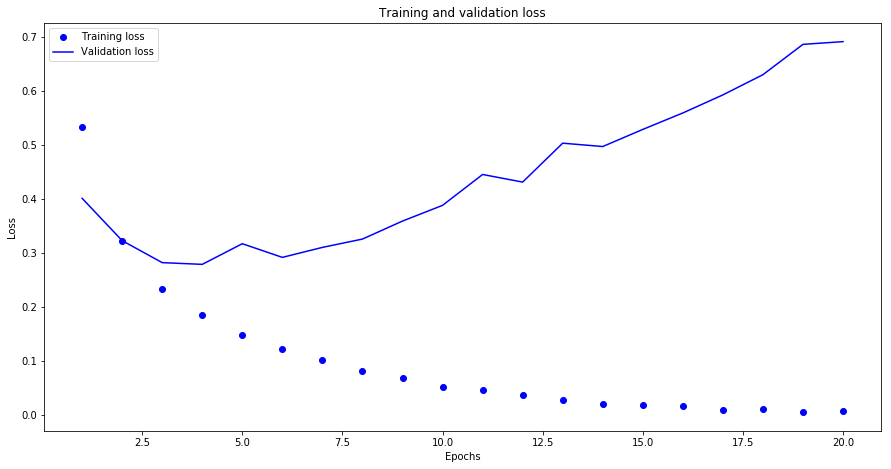

In [17]:
plt.figure(figsize=(15,7.5))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

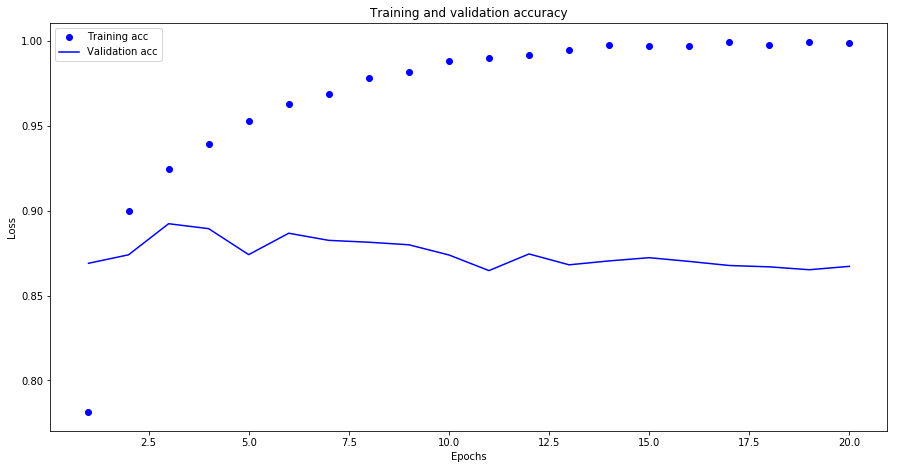

In [19]:
plt.figure(figsize=(15,7.5))
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [21]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 1s 47us/sample - loss: 0.4535 - acc: 0.8250
Epoch 2/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.2581 - acc: 0.9104
Epoch 3/4
25000/25000 [==============================] - 1s 38us/sample - loss: 0.1982 - acc: 0.93090s - loss: 0.1947 - 
Epoch 4/4
25000/25000 [==============================] - 1s 36us/sample - loss: 0.1639 - acc: 0.9430


In [23]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 50us/sample - loss: 0.3039 - acc: 0.8806


[0.3039315836954117, 0.88056]

### Using more layers

In [24]:
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 70us/sample - loss: 0.5983 - acc: 0.6872 - val_loss: 0.4780 - val_acc: 0.8592
Epoch 2/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.3652 - acc: 0.8937 - val_loss: 0.3296 - val_acc: 0.8791
Epoch 3/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.2433 - acc: 0.9239 - val_loss: 0.2825 - val_acc: 0.8887
Epoch 4/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.1846 - acc: 0.9379 - val_loss: 0.2841 - val_acc: 0.8859
Epoch 5/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.1468 - acc: 0.9539 - val_loss: 0.2963 - val_acc: 0.8825
Epoch 6/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.1213 - acc: 0.9621 - val_loss: 0.2947 - val_acc: 0.8838
Epoch 7/10
15000/15000 [==============================] - 1s 69us/sample - loss: 0.0996 - acc: 0.9696 - val_loss: 0.

### Using more hidden units

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 74us/sample - loss: 0.4981 - acc: 0.7619 - val_loss: 0.3650 - val_acc: 0.8476
Epoch 2/10
15000/15000 [==============================] - 1s 68us/sample - loss: 0.2707 - acc: 0.9016 - val_loss: 0.3123 - val_acc: 0.8759
Epoch 3/10
15000/15000 [==============================] - 1s 62us/sample - loss: 0.2059 - acc: 0.9223 - val_loss: 0.2765 - val_acc: 0.8902
Epoch 4/10
15000/15000 [==============================] - 1s 67us/sample - loss: 0.1446 - acc: 0.9481 - val_loss: 0.3116 - val_acc: 0.8818
Epoch 5/10
15000/15000 [==============================] - 1s 49us/sample - loss: 0.1187 - acc: 0.9575 - val_loss: 0.3100 - val_acc: 0.8842
Epoch 6/10
15000/15000 [==============================] - 1s 47us/sample - loss: 0.0799 - acc: 0.9735 - val_loss: 0.3624 - val_acc: 0.8808
Epoch 7/10
15000/15000 [==============================] - 1s 50us/sample - loss: 0.0687 - acc: 0.9787 - val_loss: 0.

### Using tanh activation

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 70us/sample - loss: 0.4924 - acc: 0.7657 - val_loss: 0.3285 - val_acc: 0.8828
Epoch 2/10
15000/15000 [==============================] - 1s 59us/sample - loss: 0.2652 - acc: 0.9054 - val_loss: 0.3326 - val_acc: 0.8623
Epoch 3/10
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1907 - acc: 0.9302 - val_loss: 0.2879 - val_acc: 0.8857
Epoch 4/10
15000/15000 [==============================] - 1s 56us/sample - loss: 0.1459 - acc: 0.9499 - val_loss: 0.3105 - val_acc: 0.8830
Epoch 5/10
15000/15000 [==============================] - 1s 56us/sample - loss: 0.1113 - acc: 0.9635 - val_loss: 0.3102 - val_acc: 0.8823
Epoch 6/10
15000/15000 [==============================] - 1s 57us/sample - loss: 0.0833 - acc: 0.9739 - val_loss: 0.3435 - val_acc: 0.8798
Epoch 7/10
15000/15000 [==============================] - 1s 57us/sample - loss: 0.0713 - acc: 0.9801 - val_loss: 0.